In [20]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from importlib import reload
import utils_functions
reload(utils_functions)

from utils_functions import (
    to_float_array, df_d0, dataframe1,
    fit_exponential_decay, plot_data_with_fits, plot_parameter_histograms
)
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np


Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)


In [4]:
data_path = '/workspaces/EWT/EWT5/data/EWT5_mit_Notizen.ods'
df_E_BSG_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet9", skiprows=36)
df_E_BSG_MCT1_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet7", skiprows=36)
df_E_BSG_MCT1_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet8", skiprows=36)
df_E_BSG_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet10", skiprows=36)
df_E_BSG_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet11", skiprows=36)
df_E_BSG_MCT1_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)
print(df_E_BSG_MCT1_ilacco1_0)

E_BSG_MCT1_ilacco1_0 = dataframe1(df_E_BSG_MCT1_ilacco1_0,3,5,6,7)
E_BSG_MCT1_ilacco1_1 = dataframe1(df_E_BSG_MCT1_ilacco1_1,3,5,6,7)
E_BSG_MCT1_ilacco1_2 = dataframe1(df_E_BSG_MCT1_ilacco1_2,3,5,6,7)
E_BSG_MCT1_ilacco1_0_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
E_BSG_MCT1_ilacco1_1_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
E_BSG_MCT1_ilacco1_2_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_2_50μM_CCCP,3,5,6,7)
print(E_BSG_MCT1_ilacco1_0)

    Startzeit:        20.11.2025 13:13:25 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          NaN                        NaN        NaN        NaN        NaN   
1          NaN                        NaN        NaN        NaN        NaN   
2   Zyklus Nr.                          1          2          3          4   
3     Zeit [s]                          0         13         26         39   
4   Temp. [°C]                         --         --         --         --   
5           E7                      44041      40596      38258      37696   
6           E8                      46088      45210      45085      43046   
7           E9                      42503      41873      38615      36448   
8          NaN                        NaN        NaN        NaN        NaN   
9          NaN  Efflux BSG-MCT1+ilacco1.0        NaN        NaN        NaN   
10         NaN                        NaN        NaN        NaN        NaN   
11         NaN                        NaN        NaN        NaN 

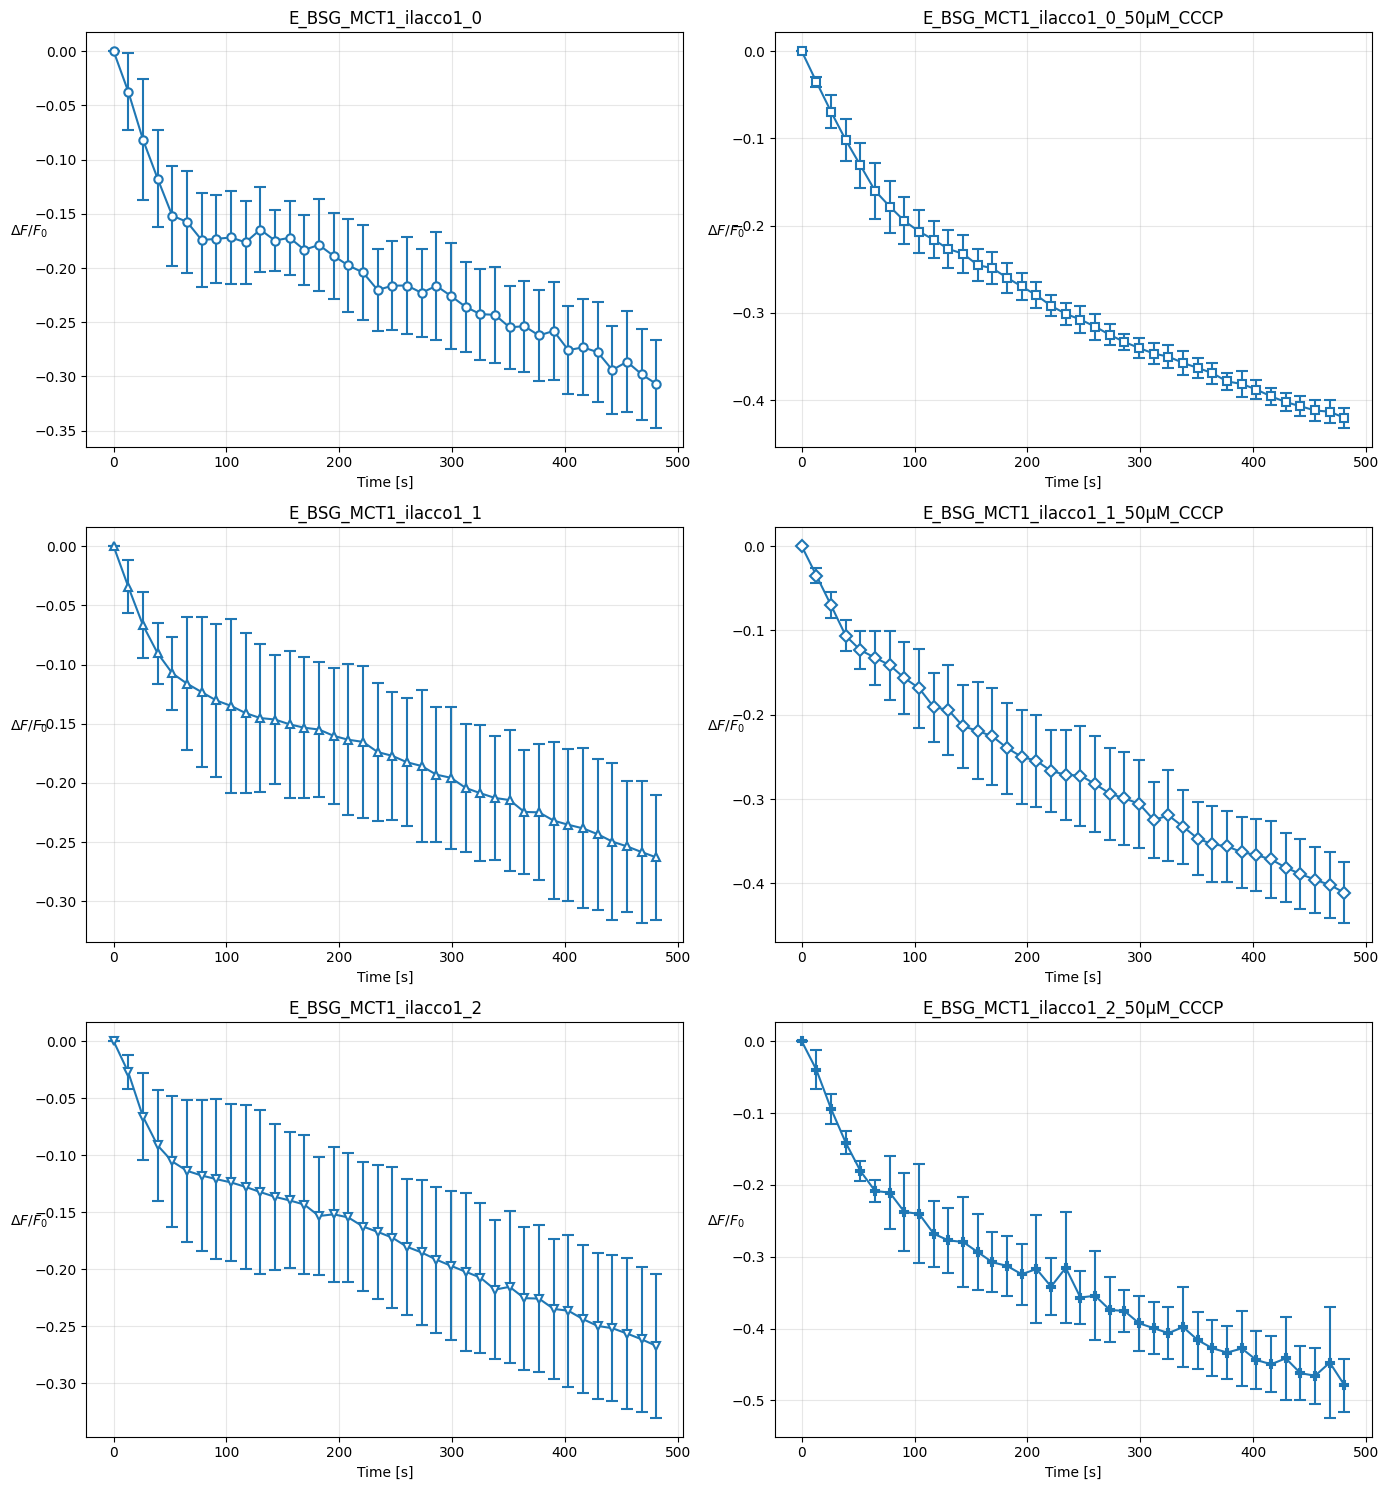

Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png
Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png


In [5]:
# Erstelle Subplots für alle `E_MCT1_ilacco1_*` DataFrames (verwende feste Spalten: 'Time','Mittelwerte','Standartabweichung')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_BSG_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_BSG_MCT1_ilacco1_" gefunden.')
os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

# Verschiedene Marker für jede Kurve
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Bestimme Grid-Größe
n = len(frames)
cols = 2
rows = (n + cols - 1) // cols if n>0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for ax in axes[n:]:
    ax.axis('off')

for i, ((name, df), ax) in enumerate(zip(frames, axes)):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Erwartete Spalten: 'Time', 'Mittelwerte'
    if 'Time' not in df.columns or 'Mittelwerte' not in df.columns:
        ax.text(0.5, 0.5, "Erwartete Spalten 'Time' oder 'Mittelwerte' fehlen", ha='center', va='center')
        ax.set_title(name)
        print(f"{name}: Fehlende Spalten. Vorhandene Spalten: {df.columns.tolist()}")
        continue

    times = pd.to_numeric(df['Time'], errors='coerce')
    means = pd.to_numeric(df['Mittelwerte'], errors='coerce')

    # Std-Spalte: bevorzugt 'Standartabweichung', fallback auf 'Standardabweichung'
    if 'Standartabweichung' in df.columns:
        stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
    elif 'Standardabweichung' in df.columns:
        stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
    else:
        stds = np.zeros_like(means)

    mask = (~times.isna()) & (~means.isna())
    if mask.sum() == 0:
        ax.text(0.5, 0.5, 'Keine gültigen Daten zum Plotten', ha='center', va='center')
    marker = markers[i % len(markers)]
    ax.errorbar(times[mask], means[mask], yerr=stds[mask], 
                marker=marker, linestyle='-', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'Efflux_all_subplots.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f'Saved combined Efflux subplot: {outpath}')
print(f'Saved combined Efflux subplot: {outpath}')
plt.show()

Saved combined overlay plot: ../figueres/Efflux_combined_overlay.png


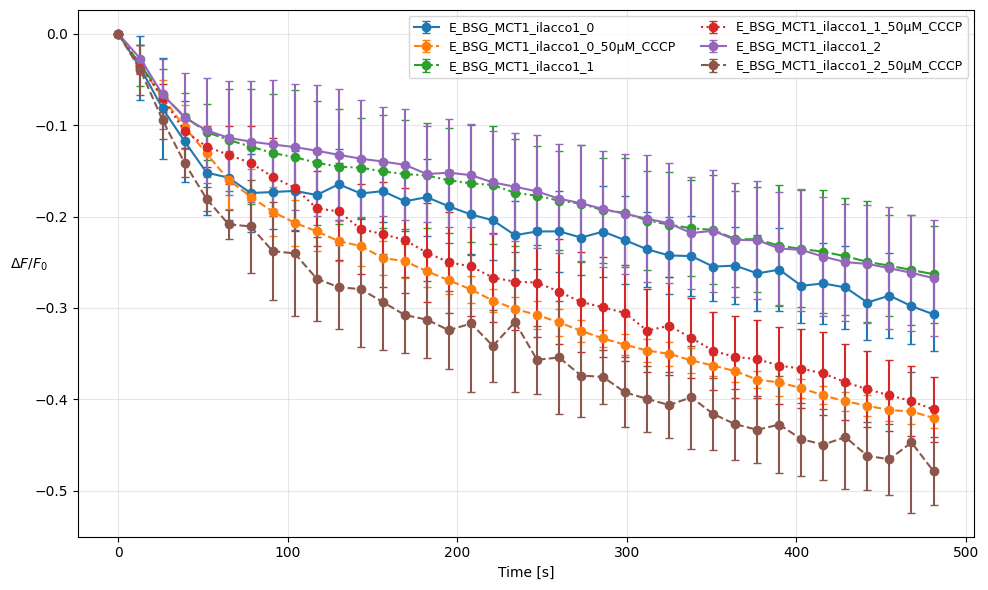

In [6]:
# Kombiniere alle `E_MCT1_ilacco1_*` DataFrames in einem Overlay-Plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_BSG_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

# Farben/linestyles
linestyles = ['-', '--', '-.', ':']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

plt.figure(figsize=(10,6))
ax = plt.gca()
plotted = False

for idx, (name, df) in enumerate(frames):
    ls = linestyles[idx % len(linestyles)]
    color = colors[idx % len(colors)]
    if df is None:
        print(f"Variable {name} nicht gefunden — überspringe.")
        continue

    # Finde Time
    if 'Time' in df.columns:
        times = pd.to_numeric(df['Time'], errors='coerce')
    else:
        times = pd.to_numeric(df.iloc[:,0], errors='coerce')

    # Verwende generische 'Mittelwerte' Spalte
    if 'Mittelwerte' in df.columns:
        means = pd.to_numeric(df['Mittelwerte'], errors='coerce')
        if 'Standartabweichung' in df.columns:
            stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
        elif 'Standardabweichung' in df.columns:
            stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
        else:
            stds = np.zeros_like(means)

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            continue
        ax.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o'+ls, color=color, label=name, capsize=3)
        plotted = True
    else:
        print(f"{name}: Spalte 'Mittelwerte' nicht gefunden, überspringe.")

if not plotted:
    print('Keine Daten geplottet (keine passenden Spalten).')
else:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)
    ax.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    outpath = os.path.join('..', 'figueres', 'Efflux_combined_overlay.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved combined overlay plot: {outpath}')
    plt.show()

Saved plot: ../figueres/BSG_MCT1_Efflux_individual_fits.png


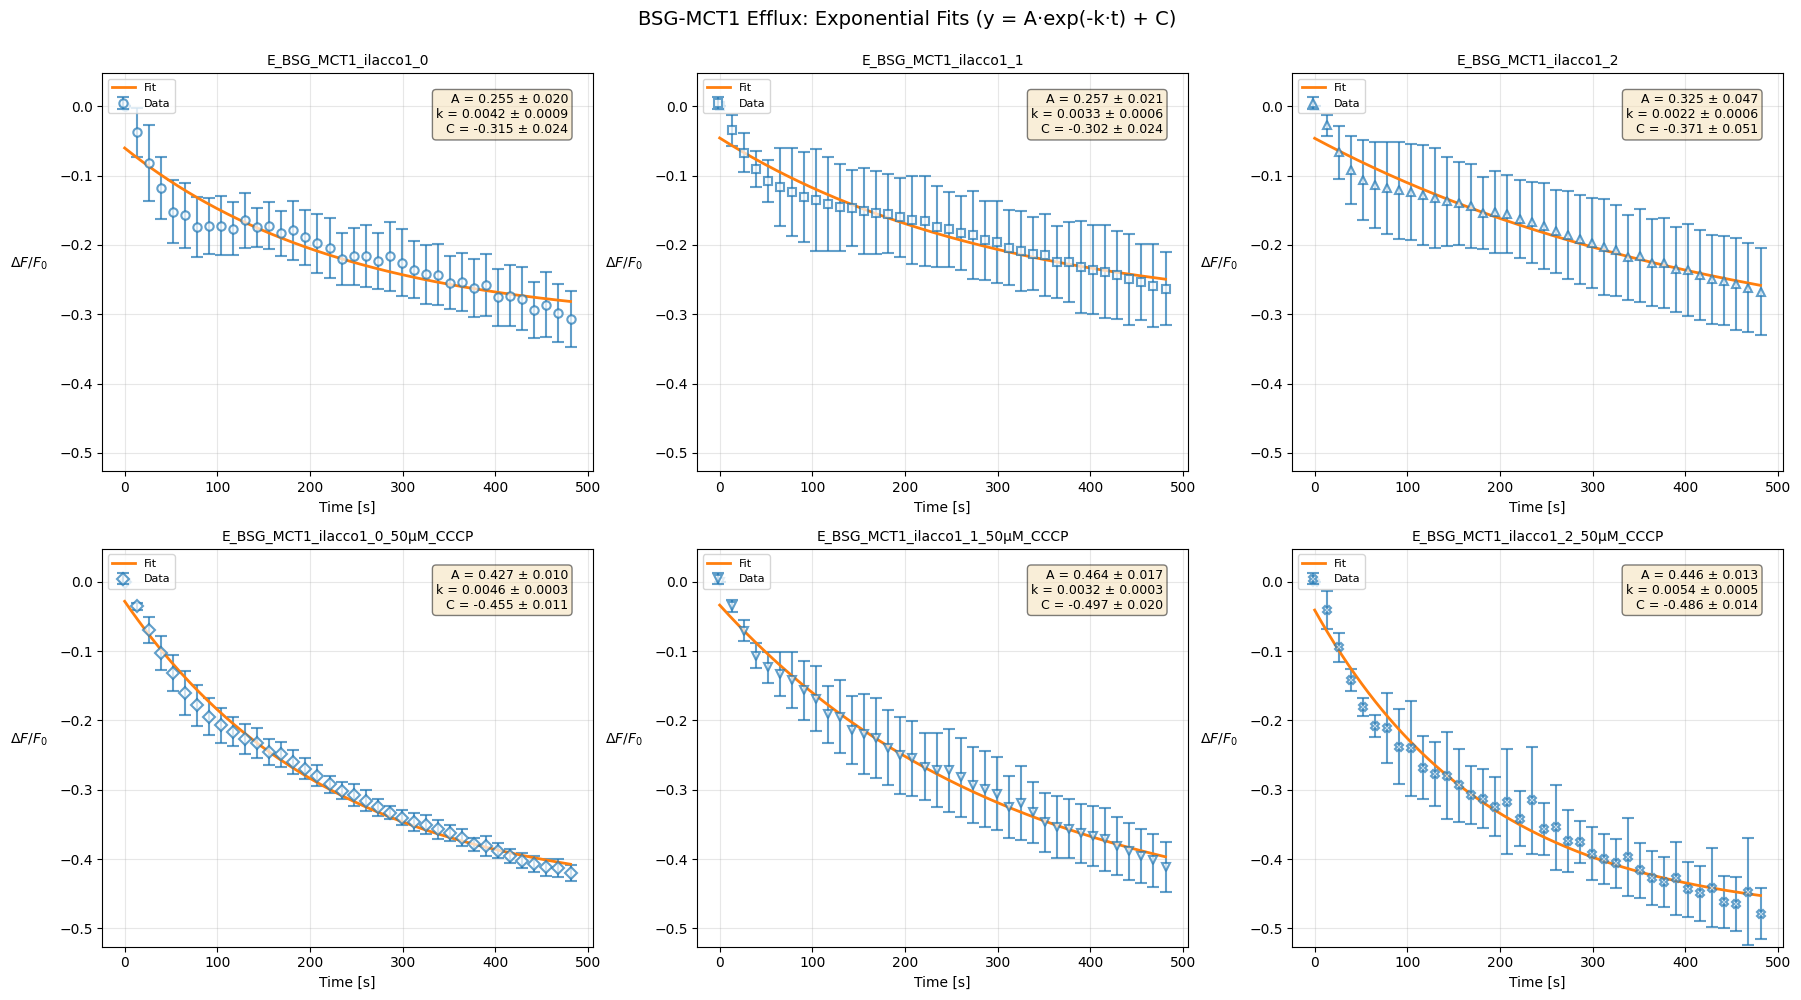

In [7]:
# Einzelne Plots mit Fits in Subplot-Figur
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definiere die Fit-Funktion
def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_BSG_MCT1_ilacco1_0','o', E_BSG_MCT1_ilacco1_0),
    ('E_BSG_MCT1_ilacco1_1', 's', E_BSG_MCT1_ilacco1_1),
    ('E_BSG_MCT1_ilacco1_2', '^', E_BSG_MCT1_ilacco1_2),
    ('E_BSG_MCT1_ilacco1_0_50μM_CCCP','D', E_BSG_MCT1_ilacco1_0_50μM_CCCP),
    ('E_BSG_MCT1_ilacco1_1_50μM_CCCP','v', E_BSG_MCT1_ilacco1_1_50μM_CCCP),
    ('E_BSG_MCT1_ilacco1_2_50μM_CCCP','X', E_BSG_MCT1_ilacco1_2_50μM_CCCP)
]

# Erstelle Subplot-Grid (2x3 für 6 Plots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames):
    ax = axes[idx]
    
    times = df["Time"].values
    means = df["Mittelwerte"].values
    stds = df["Standardabweichung"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Sammle für uniforme Skalierung
    all_times.extend(times_clean)
    all_values.extend(means_clean)
    
    # Plotte Originaldaten
    ax.errorbar(times_clean, means_clean, yerr=stds_clean, 
                marker=marker, linestyle='', label='Data', capsize=4, 
                markerfacecolor='white', markeredgewidth=1.5, markersize=6, 
                alpha=0.7, color='C0')
    
    # Führe Fit durch
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Erstelle geglättete Kurve für Fit
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
        y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Fit')
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        C_err = np.sqrt(pcov[2,2])
        
        # Füge Fit-Parameter mit Unsicherheiten als Text hinzu
        textstr = f'A = {A_fit:.3f} ± {A_err:.3f}\nk = {k_fit:.4f} ± {k_err:.4f}\nC = {C_fit:.3f} ± {C_err:.3f}'
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)[:50]}', 
                transform=ax.transAxes, ha='center', va='center', fontsize=8)
    
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', fontsize=8)

# Berechne und setze uniforme Achsenskalierung
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('BSG-MCT1 Efflux: Exponential Fits (y = A·exp(-k·t) + C)', fontsize=14, y=0.995)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'BSG_MCT1_Efflux_individual_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()

Saved parameter comparison: ../figueres/BSG_MCT1_Efflux_parameter_comparison.png


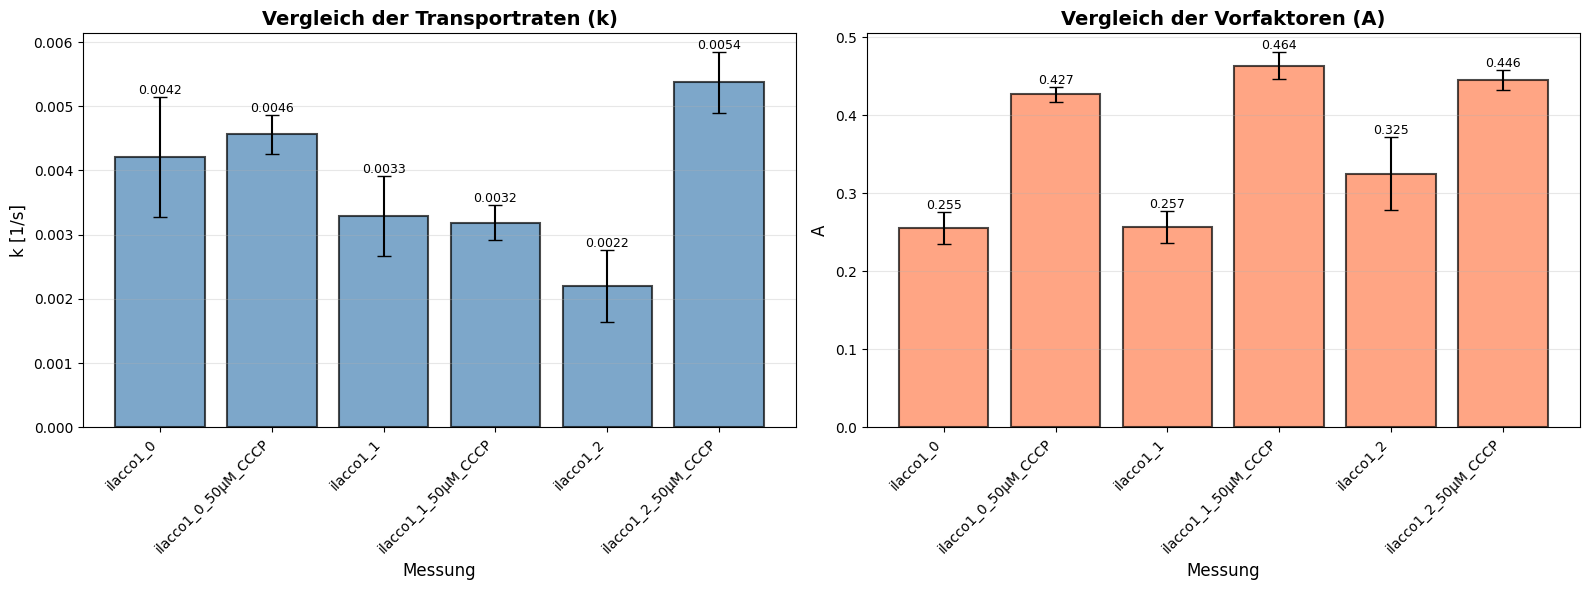


=== Fit-Parameter Zusammenfassung ===
Messung                        k [1/s]         A              
------------------------------------------------------------
ilacco1_0                      0.0042±0.0009   0.255±0.020
ilacco1_0_50μM_CCCP            0.0046±0.0003   0.427±0.010
ilacco1_1                      0.0033±0.0006   0.257±0.021
ilacco1_1_50μM_CCCP            0.0032±0.0003   0.464±0.017
ilacco1_2                      0.0022±0.0006   0.325±0.047
ilacco1_2_50μM_CCCP            0.0054±0.0005   0.446±0.013


In [8]:
# Histogramme für Fit-Parameter: k (Transportrate) und A (Vorfaktor)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_BSG_MCT1_ilacco1_0','o', E_BSG_MCT1_ilacco1_0),
    ('E_BSG_MCT1_ilacco1_0_50μM_CCCP','D', E_BSG_MCT1_ilacco1_0_50μM_CCCP),
    ('E_BSG_MCT1_ilacco1_1', 's', E_BSG_MCT1_ilacco1_1),
    ('E_BSG_MCT1_ilacco1_1_50μM_CCCP','v', E_BSG_MCT1_ilacco1_1_50μM_CCCP),
    ('E_BSG_MCT1_ilacco1_2', '^', E_BSG_MCT1_ilacco1_2),
    ('E_BSG_MCT1_ilacco1_2_50μM_CCCP','X', E_BSG_MCT1_ilacco1_2_50μM_CCCP)
]

# Listen für Parameter und Unsicherheiten
names = []
k_values = []
k_errors = []
A_values = []
A_errors = []

# Führe Fits durch und sammle Parameter
for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        
        # Speichere Werte
        names.append(name.replace('E_BSG_MCT1_', ''))
        k_values.append(k_fit)
        k_errors.append(k_err)
        A_values.append(A_fit)
        A_errors.append(A_err)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle zwei Histogramme nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogramm 1: Transportrate k
x_pos = np.arange(len(names))
bars1 = ax1.bar(x_pos, k_values, yerr=k_errors, capsize=5, 
                color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Messung', fontsize=12)
ax1.set_ylabel('k [1/s]', fontsize=12)
ax1.set_title('Vergleich der Transportraten (k)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, k_val, k_err) in enumerate(zip(bars1, k_values, k_errors)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + k_err,
            f'{k_val:.4f}', ha='center', va='bottom', fontsize=9)

# Histogramm 2: Vorfaktor A
bars2 = ax2.bar(x_pos, A_values, yerr=A_errors, capsize=5,
                color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Messung', fontsize=12)
ax2.set_ylabel('A', fontsize=12)
ax2.set_title('Vergleich der Vorfaktoren (A)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(names, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, A_val, A_err) in enumerate(zip(bars2, A_values, A_errors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
            f'{A_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'BSG_MCT1_Efflux_parameter_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved parameter comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Fit-Parameter Zusammenfassung ===')
print(f'{"Messung":<30} {"k [1/s]":<15} {"A":<15}')
print('-' * 60)
for name, k, k_e, A, A_e in zip(names, k_values, k_errors, A_values, A_errors):
    print(f'{name:<30} {k:.4f}±{k_e:.4f}   {A:.3f}±{A_e:.3f}')

In [ ]:
#Berechnung des initialen Flusses bei t=0


Saved plot: ../figueres/MCT1_function_fits.png


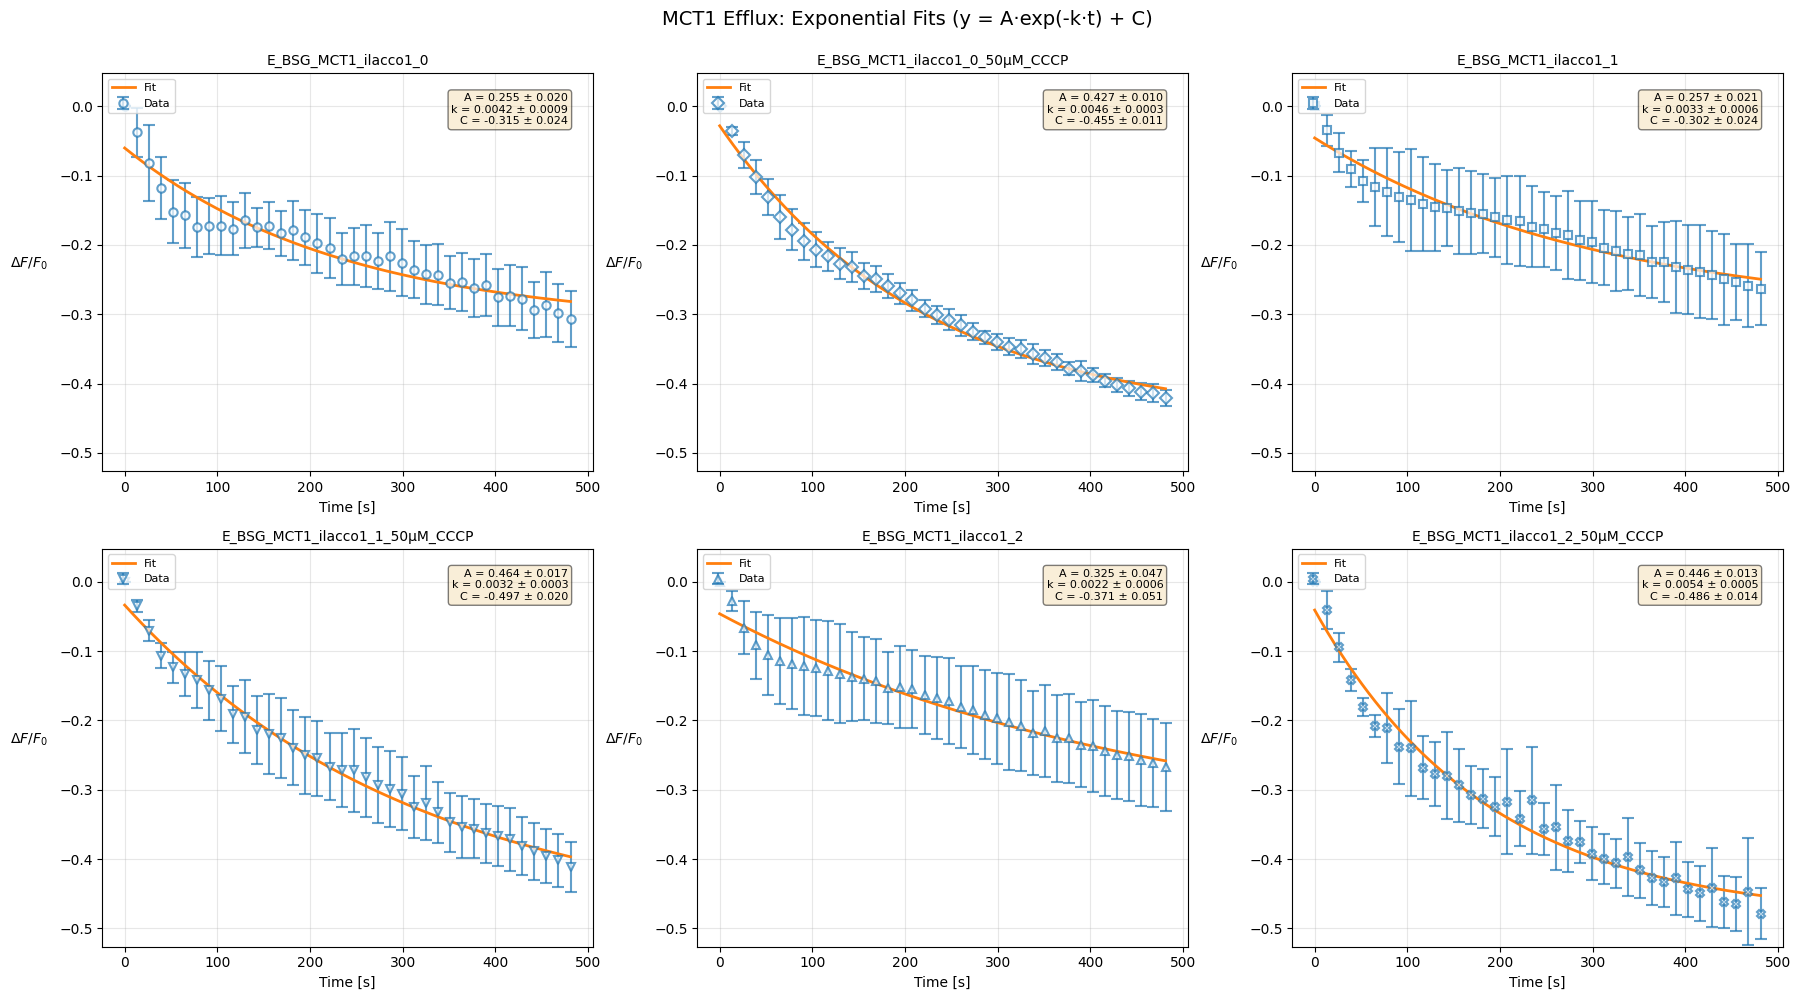

Saved parameter histograms: ../figueres/MCT1_function_parameters.png

=== Parameter-Zusammenfassung ===
Messung                        k [1/s]            A                  Flux [1/s]        
------------------------------------------------------------------------------------------
E_BSG_MCT1_ilacco1_0           0.0042±0.0009    0.255±0.020    0.00107±0.00025
E_BSG_MCT1_ilacco1_0_50μM_CCCP 0.0046±0.0003    0.427±0.010    0.00195±0.00014
E_BSG_MCT1_ilacco1_1           0.0033±0.0006    0.257±0.021    0.00084±0.00017
E_BSG_MCT1_ilacco1_1_50μM_CCCP 0.0032±0.0003    0.464±0.017    0.00148±0.00014
E_BSG_MCT1_ilacco1_2           0.0022±0.0006    0.325±0.047    0.00072±0.00021
E_BSG_MCT1_ilacco1_2_50μM_CCCP 0.0054±0.0005    0.446±0.013    0.00240±0.00022


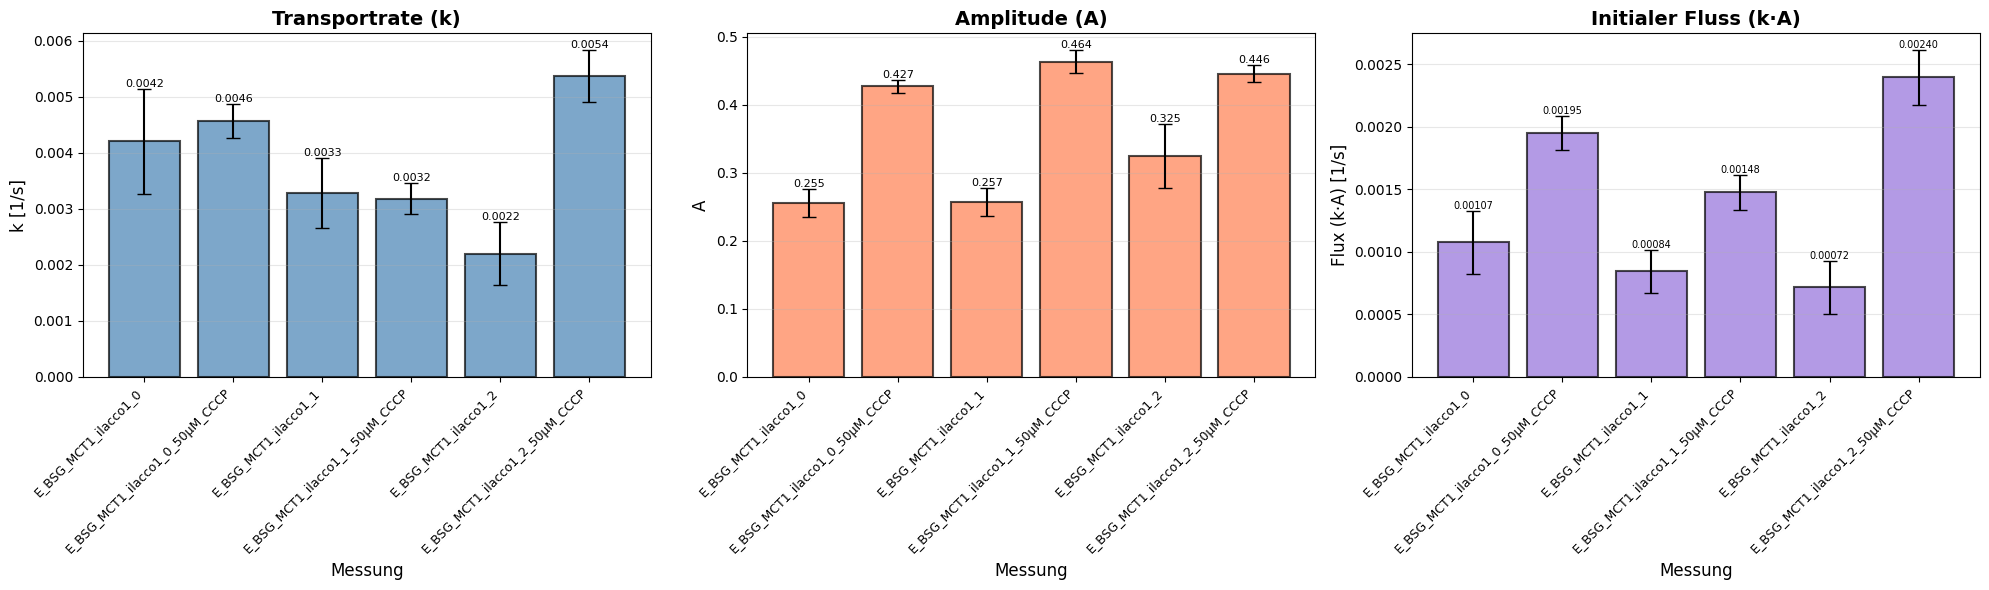

In [21]:
# Beispiel: Verwendung der drei Funktionen
# Definiere die Daten


# 1. Führe Fits durch
fit_results = fit_exponential_decay(data_frames)

# 2. Erstelle Plot mit Daten und Fits
fig1, axes1 = plot_data_with_fits(
    fit_results, 
    title='MCT1 Efflux: Exponential Fits (y = A·exp(-k·t) + C)',
    save_path=os.path.join('..', 'figueres', 'MCT1_function_fits.png'),
    uniform_axes=True
)
plt.show()

# 3. Erstelle Histogramme für Parameter-Vergleich
fig2, axes2 = plot_parameter_histograms(
    fit_results,
    save_path=os.path.join('..', 'figueres', 'MCT1_function_parameters.png'),
    figsize=(20, 6)
)
plt.show()
